In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('/Users/shreyas/Desktop/Maersk/Maersk/dpl&eda/df_enc.csv')

In [28]:
df.head(10)

,ProdType_enc,Manufacturer_enc,AreaCode_enc,SrcChnl_enc,ProdSize_enc,SrcMonth_enc,SourcingCost
0,2,0,19,3,1,10,10.16
1,1,0,44,0,1,3,134.28
2,2,1,12,0,1,5,12.46
3,2,0,9,3,2,7,107.22
4,1,0,19,0,1,4,197.76
5,0,0,1,0,1,2,137.93
6,1,0,10,0,1,2,105.59
7,1,0,20,0,2,8,90.78
8,2,0,9,2,1,4,154.04
9,2,1,12,0,1,8,85.71


In [29]:
train = df[df['SrcMonth_enc'] != 11]
test = df[df['SrcMonth_enc'] == 11]

In [30]:
monthly_data = train.groupby('SrcMonth_enc').agg({'SourcingCost': ['mean', 'std', 'median']}).reset_index()

In [31]:
df = df.groupby('SrcMonth_enc').agg({'SourcingCost': ['mean', 'std', 'median']}).reset_index()

### Here we have defined a Training Dataset that is the feature descriptors of the Data Distribution against the time variable "Month of Sourcing".

### Here we will train a model that will take month as an Input and Output Mean, Standard Deviation and Median of the Forecast for given month

In [32]:
monthly_data

SrcMonth_enc SourcingCost                    
                        mean         std  median
0             0   101.532779   67.644594  115.24
1             1    99.213042   56.611208  108.30
2             2    95.889838  113.719865  108.10
3             3    98.776522  224.128972  109.58
4             4   107.299802   82.921167  137.67
5             5   112.880565   79.505252  140.90
6             6   112.106085   82.175352  140.83
7             7   119.825242  100.777518  142.61
8             8   120.651969   96.694014  141.58
9             9   111.223734   61.304815  141.22
10           10   110.500465   88.214376  133.66

In [33]:
df

SrcMonth_enc SourcingCost                     
                        mean         std   median
0             0   101.532779   67.644594  115.240
1             1    99.213042   56.611208  108.300
2             2    95.889838  113.719865  108.100
3             3    98.776522  224.128972  109.580
4             4   107.299802   82.921167  137.670
5             5   112.880565   79.505252  140.900
6             6   112.106085   82.175352  140.830
7             7   119.825242  100.777518  142.610
8             8   120.651969   96.694014  141.580
9             9   111.223734   61.304815  141.220
10           10   110.500465   88.214376  133.660
11           11   106.208021   52.359484  117.245

## Machine Learning

## 1. Linear Regression

### Linear Regression simply computes the slope and intercept and fits a Line onto the Data Distribution. This is hardly helpful in case of a complex trend following data like the one available to us. But it does allow us to study and make a structure for ML training without taking much time

In [9]:
from sklearn.linear_model import LinearRegression

X = monthly_data.drop('SourcingCost', axis=1)
y = monthly_data['SourcingCost']

model = LinearRegression()
model.fit(X, y)

/var/folders/rv/02zbcgrd6nscjm0fybwgjtn80000gn/T/ipykernel_7263/1302543971.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = monthly_data.drop('SourcingCost', axis=1)


LinearRegression()

In [10]:
june_2021_feature = pd.DataFrame({'SrcMonth_enc': [11]})
june_2021_forecast = model.predict(june_2021_feature)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [11]:
print(june_2021_forecast)

[[119.8493482   86.14139759 150.52309091]]


In [12]:
june_2021_prediction = june_2021_forecast[0][0]
print(june_2021_prediction)

119.8493481967995


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


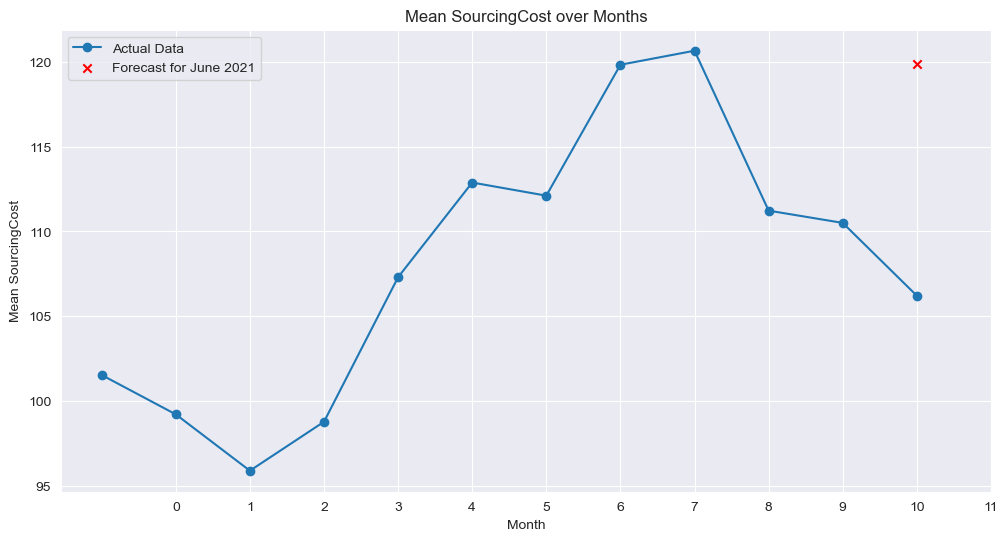

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['SrcMonth_enc'], df[('SourcingCost', 'mean')], label='Actual Data', marker='o')

june_2021_forecast = model.predict(june_2021_feature)
plt.scatter([11], june_2021_forecast[0][0], color='red', label='Forecast for June 2021', marker='x')

plt.title('Mean SourcingCost over Months')
plt.xlabel('Month')
plt.ylabel('Mean SourcingCost')
plt.xticks(range(1, 13), df['SrcMonth_enc'])
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


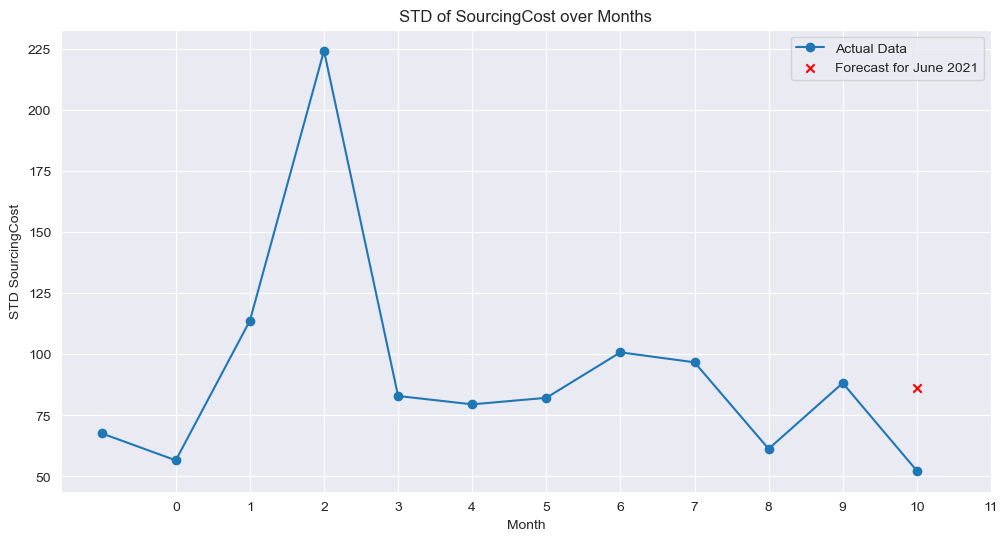

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['SrcMonth_enc'], df[('SourcingCost', 'std')], label='Actual Data', marker='o')

june_2021_forecast = model.predict(june_2021_feature)
plt.scatter([11], june_2021_forecast[0][1], color='red', label='Forecast for June 2021', marker='x')

plt.title('STD of SourcingCost over Months')
plt.xlabel('Month')
plt.ylabel('STD SourcingCost')
plt.xticks(range(1, 13), df['SrcMonth_enc'])
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


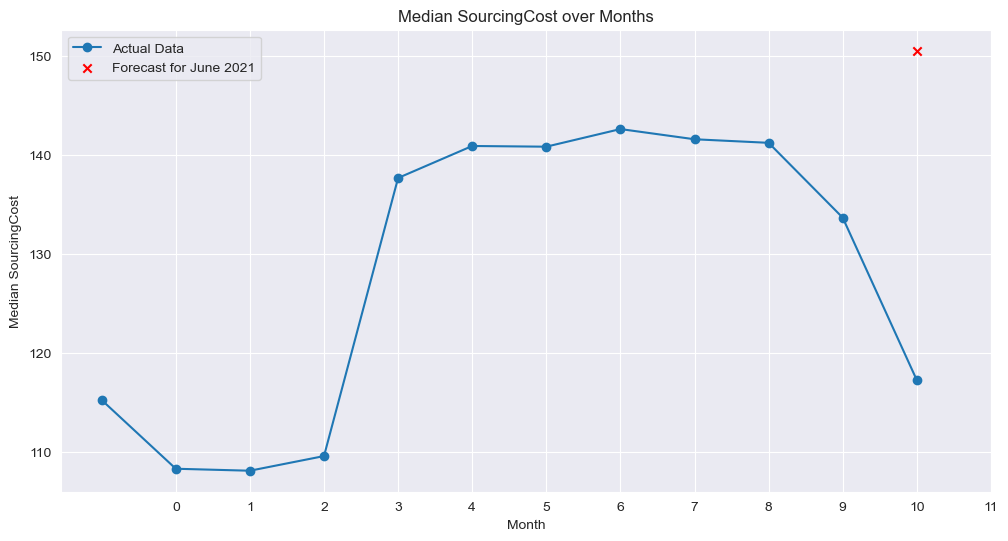

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['SrcMonth_enc'], df[('SourcingCost', 'median')], label='Actual Data', marker='o')

june_2021_forecast = model.predict(june_2021_feature)
plt.scatter([11], june_2021_forecast[0][2], color='red', label='Forecast for June 2021', marker='x')

plt.title('Median SourcingCost over Months')
plt.xlabel('Month')
plt.ylabel('Median SourcingCost')
plt.xticks(range(1, 13), df['SrcMonth_enc'])
plt.legend()
plt.grid(True)
plt.show()

Just as expected fitting a line wont help us in forecasting much so lets switch to a different versatile approach

## 2. Random Forest Regressor

/var/folders/rv/02zbcgrd6nscjm0fybwgjtn80000gn/T/ipykernel_7263/618110863.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = monthly_data.drop('SourcingCost', axis=1)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


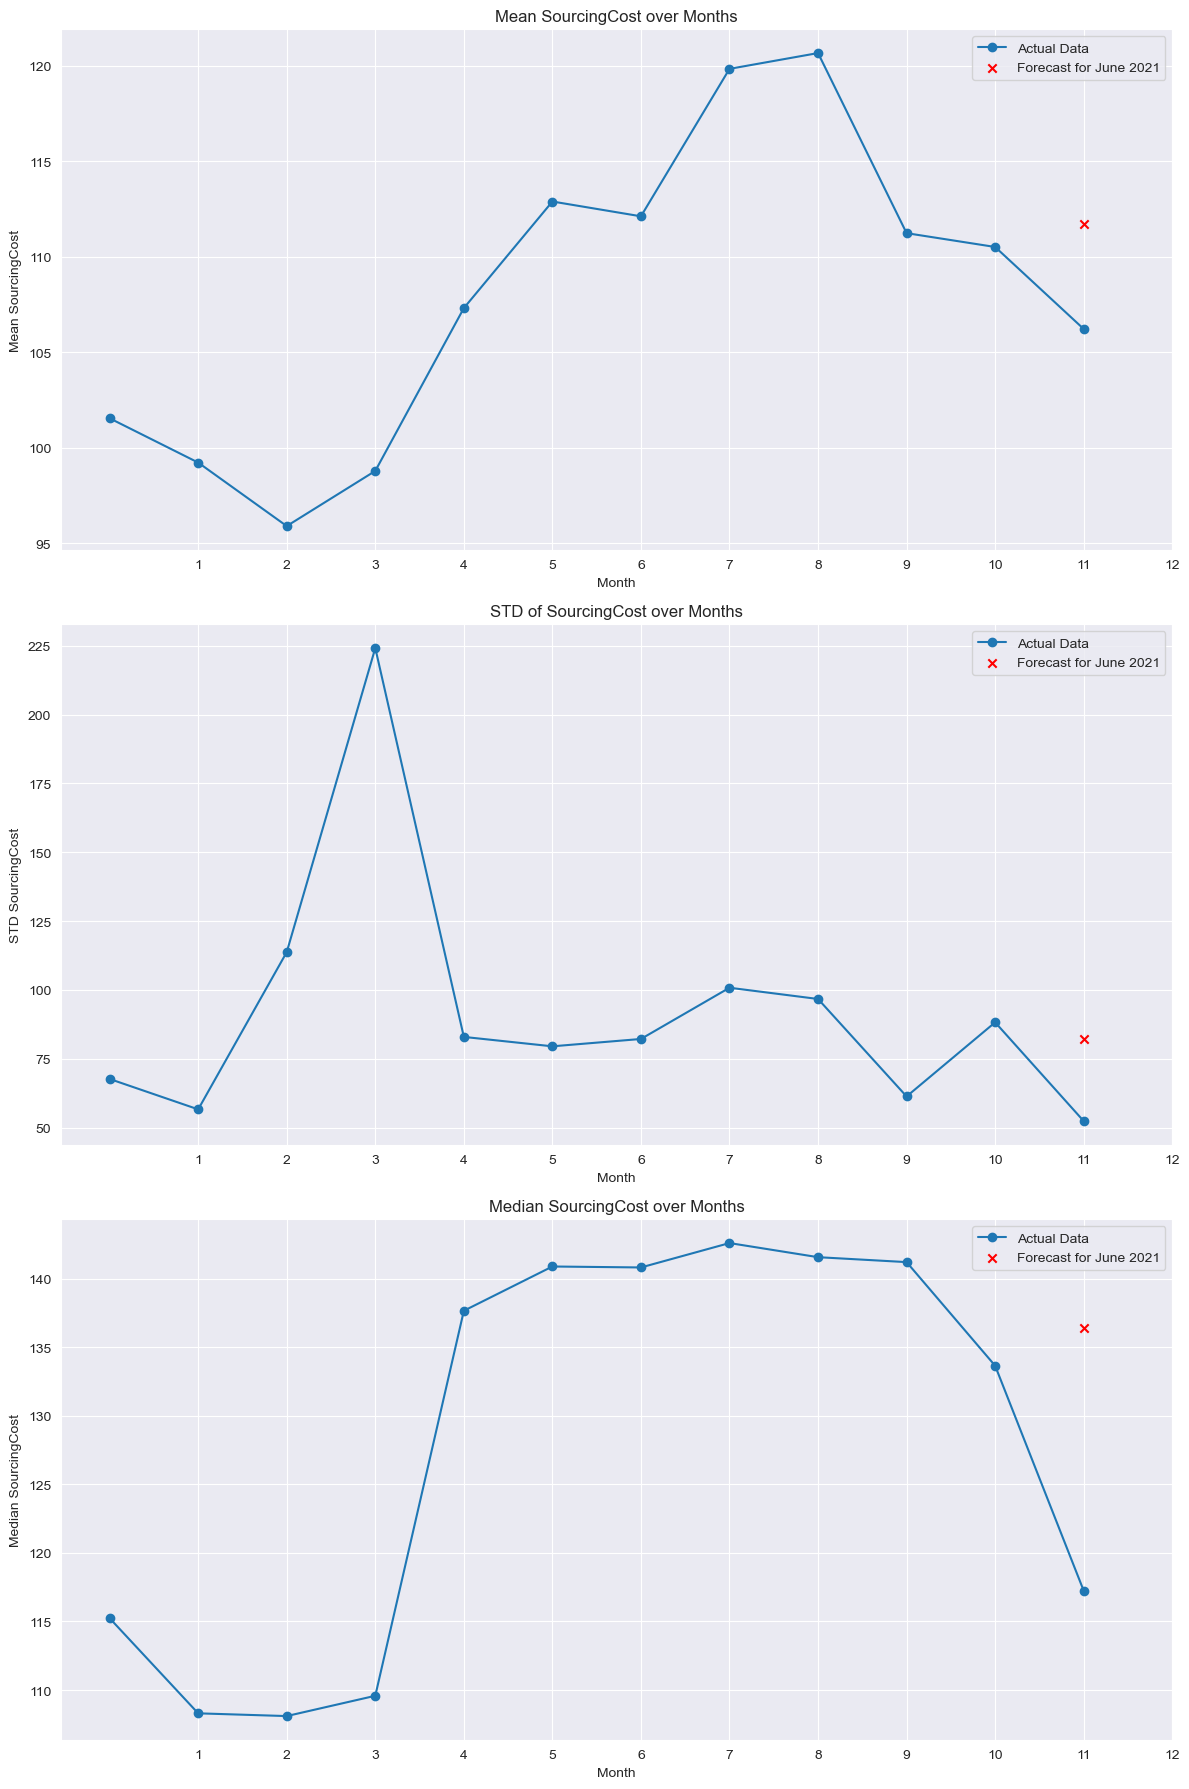

In [16]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

X = monthly_data.drop('SourcingCost', axis=1)
y = monthly_data['SourcingCost']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

june_2021_feature = pd.DataFrame({'SrcMonth_enc': [11]})
june_2021_forecast = model.predict(june_2021_feature)

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

axes[0].plot(df['SrcMonth_enc'], df[('SourcingCost', 'mean')], marker='o', label='Actual Data')
axes[0].scatter([11], june_2021_forecast[0][0], color='red', label='Forecast for June 2021', marker='x')
axes[0].set_title('Mean SourcingCost over Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Mean SourcingCost')
axes[0].set_xticks(range(1, 13))
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df['SrcMonth_enc'], df[('SourcingCost', 'std')], marker='o', label='Actual Data')
axes[1].scatter([11], june_2021_forecast[0][1], color='red', label='Forecast for June 2021', marker='x')
axes[1].set_title('STD of SourcingCost over Months')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('STD SourcingCost')
axes[1].set_xticks(range(1, 13))
axes[1].legend()
axes[1].grid(True)

axes[2].plot(df['SrcMonth_enc'], df[('SourcingCost', 'median')], marker='o', label='Actual Data')
axes[2].scatter([11], june_2021_forecast[0][2], color='red', label='Forecast for June 2021', marker='x')
axes[2].set_title('Median SourcingCost over Months')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Median SourcingCost')
axes[2].set_xticks(range(1, 13))
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

Random Forest Regressor shows better performance than Linear regression in terms of how close the statistical Predictions are to our actual value. It is highly parameterized and customizable and has potential of adapting itself to complex data distributions. Lets try tuning it a bit for better optimised performance

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

best_mse = float('inf')
best_n_estimators = 0

n_estimators_range = range(1, 101)

for n_estimators in n_estimators_range:
    list_mse = []
    for _ in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        list_mse.append(mse)
    avg_mse = sum(list_mse) / len(list_mse)
    if avg_mse < best_mse:
        best_mse = avg_mse
        best_n_estimators = n_estimators

print("Best n_estimators:", best_n_estimators)
print("Best MSE:", best_mse)

Best n_estimators: 4
Best MSE: 121.50841188372615


In [20]:
best_mse = float('inf')
best_max_depth = 0
best_min_samples_split = 0

max_depth_range = range(1, 21)
min_samples_split_range = range(2, 11)

for max_depth in max_depth_range:
    for min_samples_split in min_samples_split_range:
        list_mse = []
        for _ in range(10):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            model = RandomForestRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            list_mse.append(mse)
        avg_mse = sum(list_mse) / len(list_mse)
        if avg_mse < best_mse:
            best_mse = avg_mse
            best_max_depth = max_depth
            best_min_samples_split = min_samples_split

print("Best max_depth:", best_max_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Best MSE:", best_mse)

Best max_depth: 5
Best min_samples_split: 2
Best MSE: 161.48707291495774


In [22]:
X = monthly_data.drop('SourcingCost', axis=1)
y = monthly_data['SourcingCost']

model = RandomForestRegressor(n_estimators=4, max_depth=5, min_samples_split=2, random_state=42)
model.fit(X, y)

/var/folders/rv/02zbcgrd6nscjm0fybwgjtn80000gn/T/ipykernel_7263/598769403.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = monthly_data.drop('SourcingCost', axis=1)


RandomForestRegressor(max_depth=5, n_estimators=4, random_state=42)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


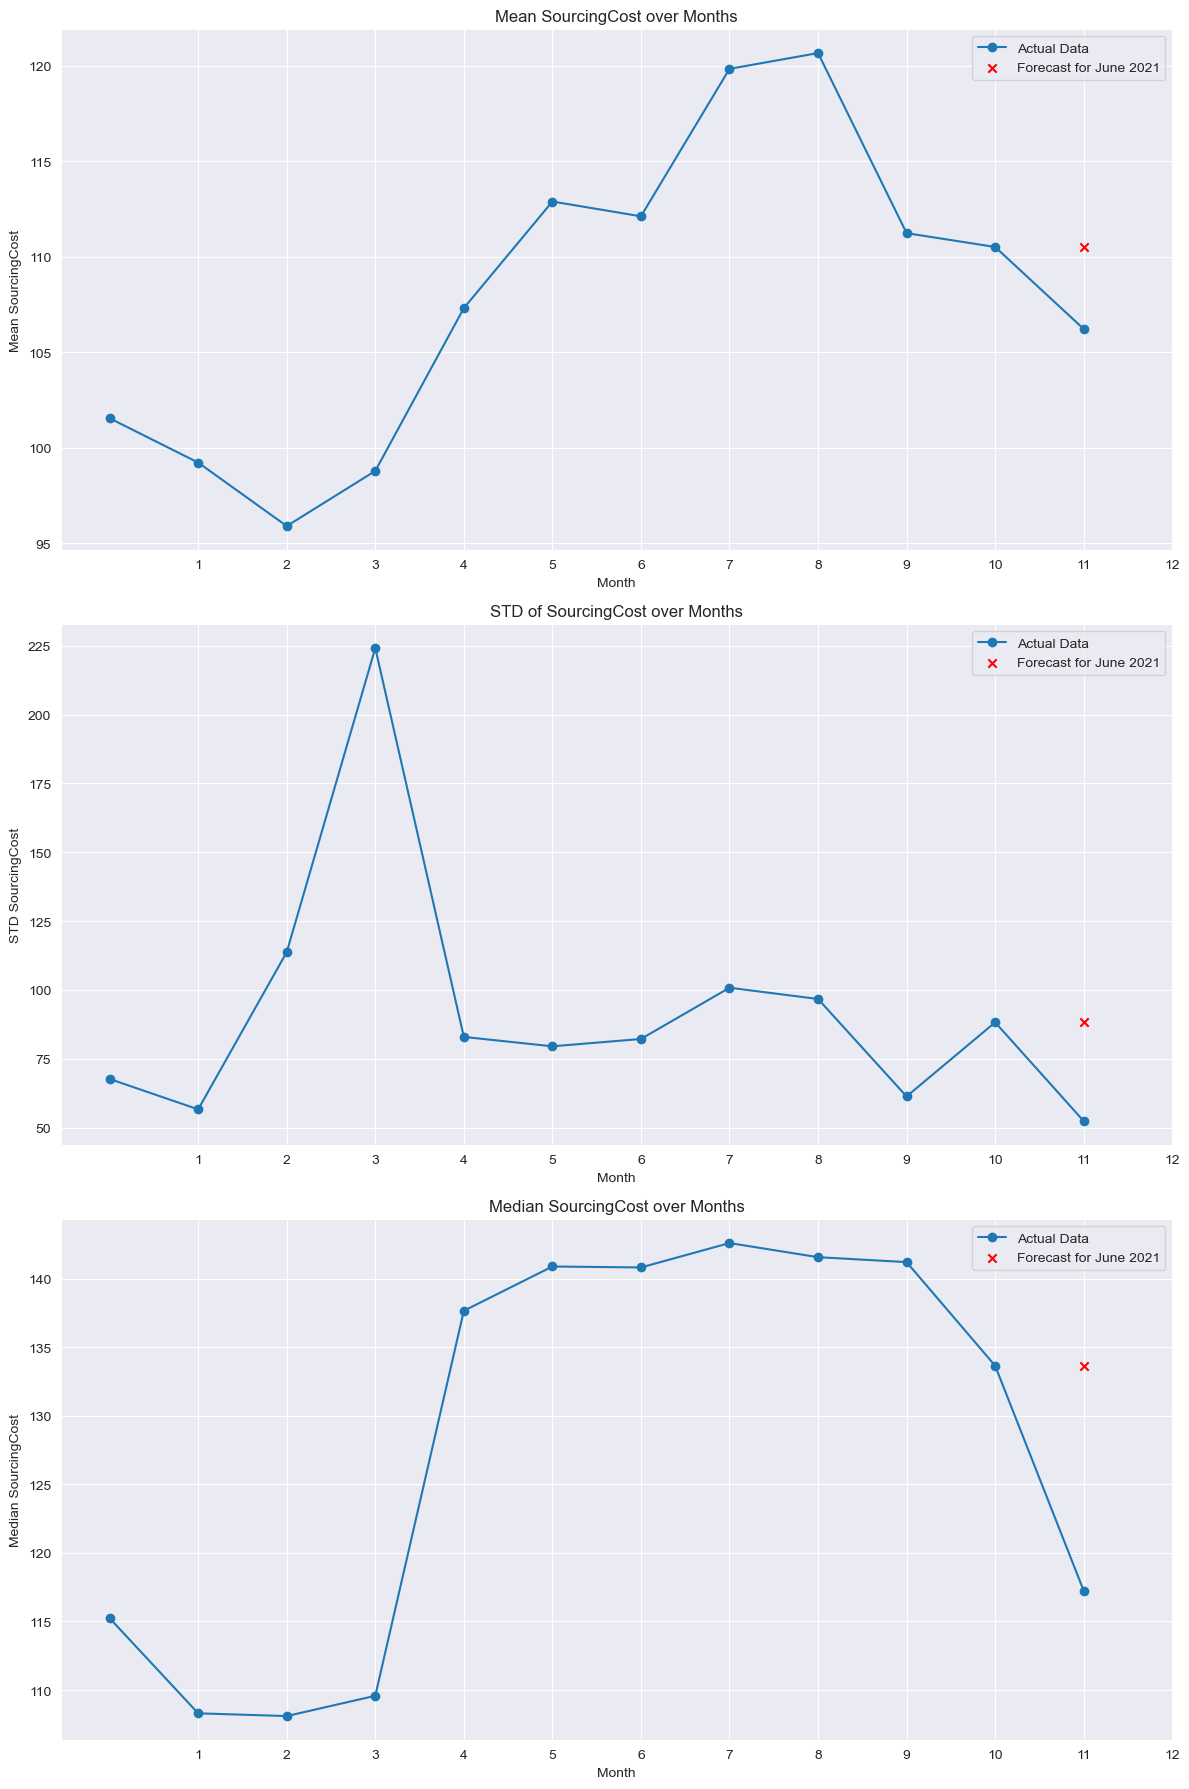

In [23]:
june_2021_feature = pd.DataFrame({'SrcMonth_enc': [11]})
june_2021_forecast = model.predict(june_2021_feature)

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

axes[0].plot(df['SrcMonth_enc'], df[('SourcingCost', 'mean')], marker='o', label='Actual Data')
axes[0].scatter([11], june_2021_forecast[0][0], color='red', label='Forecast for June 2021', marker='x')
axes[0].set_title('Mean SourcingCost over Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Mean SourcingCost')
axes[0].set_xticks(range(1, 13))
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df['SrcMonth_enc'], df[('SourcingCost', 'std')], marker='o', label='Actual Data')
axes[1].scatter([11], june_2021_forecast[0][1], color='red', label='Forecast for June 2021', marker='x')
axes[1].set_title('STD of SourcingCost over Months')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('STD SourcingCost')
axes[1].set_xticks(range(1, 13))
axes[1].legend()
axes[1].grid(True)

axes[2].plot(df['SrcMonth_enc'], df[('SourcingCost', 'median')], marker='o', label='Actual Data')
axes[2].scatter([11], june_2021_forecast[0][2], color='red', label='Forecast for June 2021', marker='x')
axes[2].set_title('Median SourcingCost over Months')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Median SourcingCost')
axes[2].set_xticks(range(1, 13))
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

### As we can observe the performance can improve with Tuning of Hyperparameters. This approach can be tried with other popular algorithms as well like SVMs, NaiveBayes Classifiers to compare and Chose better performing models

## Issue with Deep Learning

Deep Learning algorithms require a huge dataset. Here we do have the dataset but not in the required format. A popular approach for such problems is to use sequence 2 sequence models(like RNN, LSTM, GRU, etc.) but that requires Continuous Data. Here as we have discretized or data to months, it leaves us with 11-12 values in our dataset which is insifficient for DL

### The data given has no sequence in the sense that sourcing done on 1st data of a month and last day of the month is treated the same way. Hence we cannot feed a sequence like of data over days as the time dependency has been removed by simply giving the month and hence an entire months worth of data depends upon the singular value of a month. The same is the reason to use Data Descriptors Like Mean STD and Median for Data modelling. And we can only forecast the same as trying to forecast the data itself would be no short of guess work as per my opinion.  

As the organization must be concerned with sourcing cost, just prediction of a median and mean sourcing cost over a month is valuable information and that has been demonstrated in this notebook